In [1]:
! git clone https://github.com/marcusklasson/GroceryStoreDataset.git
! pip install --upgrade pip
! pip install -r requirements.txt

fatal: destination path 'GroceryStoreDataset' already exists and is not an empty directory.


In [2]:
import pickle

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from scipy.stats import skew, kurtosis
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-11-17 20:23:48.002488: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 20:23:48.005743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-17 20:23:48.016906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731893028.033266   15258 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731893028.037999   15258 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 20:23:48.054822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# 1. Lectura de los datos

In [3]:
# RUTAS
dataset_route = "GroceryStoreDataset/"

In [4]:
data_classes = pd.read_csv(f"{dataset_route}dataset/classes.csv")
data_classes

,Class Name (str),Class ID (int),Coarse Class Name (str),Coarse Class ID (int),Iconic Image Path (str),Product Description Path (str)
0,Golden-Delicious,0,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Go...,/iconic-images-and-descriptions/Fruit/Apple/Go...
1,Granny-Smith,1,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Gr...,/iconic-images-and-descriptions/Fruit/Apple/Gr...
2,Pink-Lady,2,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Pi...,/iconic-images-and-descriptions/Fruit/Apple/Pi...
3,Red-Delicious,3,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Re...,/iconic-images-and-descriptions/Fruit/Apple/Re...
4,Royal-Gala,4,Apple,0,/iconic-images-and-descriptions/Fruit/Apple/Ro...,/iconic-images-and-descriptions/Fruit/Apple/Ro...
...,...,...,...,...,...,...
76,Red-Beet,76,Red-Beet,40,/iconic-images-and-descriptions/Vegetables/Red...,/iconic-images-and-descriptions/Vegetables/Red...
77,Beef-Tomato,77,Tomato,41,/iconic-images-and-descriptions/Vegetables/Tom...,/iconic-images-and-descriptions/Vegetables/Tom...
78,Regular-Tomato,78,Tomato,41,/iconic-images-and-descriptions/Vegetables/Tom...,/iconic-images-and-descriptions/Vegetables/Tom...
79,Vine-Tomato,79,Tomato,41,/iconic-images-and-descriptions/Vegetables/Tom...,/iconic-images-and-descriptions/Vegetables/Tom...


### 1.1. Etiquetas gruesas

In [5]:
etiquetas = data_classes[["Coarse Class Name (str)", "Coarse Class ID (int)"]]
etiquetas.sample(10)

,Coarse Class Name (str),Coarse Class ID (int)
79,Tomato,41
63,Cucumber,32
23,Pineapple,14
78,Tomato,41
50,Soyghurt,25
58,Yoghurt,27
69,Pepper,38
19,Peach,12
11,Melon,7
25,Pomegranate,16


In [6]:
etiq = []

for i in range(len(etiquetas)):
    etiqueta = etiquetas.loc[i]
    etiq.append((etiqueta["Coarse Class Name (str)"], int(etiqueta["Coarse Class ID (int)"])))

etiq = set(etiq)

In [7]:
etiq = list(etiq)
etiquetas = {i[1]: i[0] for i in etiq}

In [8]:
etiquetas_ordenadas = dict(sorted(etiquetas.items(), key=lambda item: int(item[0])))
etiquetas_ordenadas

{0: 'Apple',
 1: 'Avocado',
 2: 'Banana',
 3: 'Kiwi',
 4: 'Lemon',
 5: 'Lime',
 6: 'Mango',
 7: 'Melon',
 8: 'Nectarine',
 9: 'Orange',
 10: 'Papaya',
 11: 'Passion-Fruit',
 12: 'Peach',
 13: 'Pear',
 14: 'Pineapple',
 15: 'Plum',
 16: 'Pomegranate',
 17: 'Red-Grapefruit',
 18: 'Satsumas',
 19: 'Juice',
 20: 'Milk',
 21: 'Oatghurt',
 22: 'Oat-Milk',
 23: 'Sour-Cream',
 24: 'Sour-Milk',
 25: 'Soyghurt',
 26: 'Soy-Milk',
 27: 'Yoghurt',
 28: 'Asparagus',
 29: 'Aubergine',
 30: 'Cabbage',
 31: 'Carrots',
 32: 'Cucumber',
 33: 'Garlic',
 34: 'Ginger',
 35: 'Leek',
 36: 'Mushroom',
 37: 'Onion',
 38: 'Pepper',
 39: 'Potato',
 40: 'Red-Beet',
 41: 'Tomato',
 42: 'Zucchini'}

### 1.2. Etiquetas finas

In [9]:
etiquetas_finas = data_classes[["Class Name (str)", "Class ID (int)"]]
etiquetas_finas.sample(10)

,Class Name (str),Class ID (int)
37,Tropicana-Mandarin-Morning,37
9,Lime,9
13,Honeydew-Melon,13
33,God-Morgon-Red-Grapefruit-Juice,33
7,Kiwi,7
34,Tropicana-Apple-Juice,34
64,Garlic,64
52,Alpro-Shelf-Soy-Milk,52
27,Satsumas,27
46,Arla-Ecological-Sour-Cream,46


In [10]:
etiq_finas = []

for i in range(len(etiquetas_finas)):
    etiqueta_fina = etiquetas_finas.loc[i]
    etiq_finas.append((etiqueta_fina["Class Name (str)"], int(etiqueta_fina["Class ID (int)"])))

etiq_finas = set(etiq_finas)

In [11]:
etiq_finas = list(etiq_finas)
etiquetas_finas = {i[1]: i[0] for i in etiq_finas}

In [12]:
etiquetas_finas_ordenadas = dict(sorted(etiquetas_finas.items(), key=lambda item: int(item[0])))
etiquetas_finas_ordenadas

{0: 'Golden-Delicious',
 1: 'Granny-Smith',
 2: 'Pink-Lady',
 3: 'Red-Delicious',
 4: 'Royal-Gala',
 5: 'Avocado',
 6: 'Banana',
 7: 'Kiwi',
 8: 'Lemon',
 9: 'Lime',
 10: 'Mango',
 11: 'Cantaloupe',
 12: 'Galia-Melon',
 13: 'Honeydew-Melon',
 14: 'Watermelon',
 15: 'Nectarine',
 16: 'Orange',
 17: 'Papaya',
 18: 'Passion-Fruit',
 19: 'Peach',
 20: 'Anjou',
 21: 'Conference',
 22: 'Kaiser',
 23: 'Pineapple',
 24: 'Plum',
 25: 'Pomegranate',
 26: 'Red-Grapefruit',
 27: 'Satsumas',
 28: 'Bravo-Apple-Juice',
 29: 'Bravo-Orange-Juice',
 30: 'God-Morgon-Apple-Juice',
 31: 'God-Morgon-Orange-Juice',
 32: 'God-Morgon-Orange-Red-Grapefruit-Juice',
 33: 'God-Morgon-Red-Grapefruit-Juice',
 34: 'Tropicana-Apple-Juice',
 35: 'Tropicana-Golden-Grapefruit',
 36: 'Tropicana-Juice-Smooth',
 37: 'Tropicana-Mandarin-Morning',
 38: 'Arla-Ecological-Medium-Fat-Milk',
 39: 'Arla-Lactose-Medium-Fat-Milk',
 40: 'Arla-Medium-Fat-Milk',
 41: 'Arla-Standard-Milk',
 42: 'Garant-Ecological-Medium-Fat-Milk',
 43: '

In [13]:
# Función para abrir una imagen y convertirla en un array
def cargar_imagen(ruta):
    try:
        # Abre la imagen y la convierte a modo RGB
        imagen = Image.open(f"{dataset_route}dataset/{ruta}").convert('RGB')
        # Convierte la imagen en un array de numpy
        imagen_array = np.array(imagen)
        return imagen_array
    except Exception as e:
        print(f"Error al cargar la imagen en {ruta}: {e}")
        return None

In [14]:
train= pd.read_csv(f"{dataset_route}dataset/train.txt", header=None, names=["route", "Class ID (int)", "Coarse Class ID"])
# Aplica la función de carga a cada ruta de imagen y almacena los arrays en una nueva columna
train['image_array'] = train['route'].apply(cargar_imagen)
train['Coarse Class str'] = train['Coarse Class ID'].apply(lambda x: etiquetas.get(x, "No Aplica"))
train['Class str'] = train['Class ID (int)'].apply(lambda x: etiquetas_finas.get(x, "No Aplica"))
train.sample(5)

,route,Class ID (int),Coarse Class ID,image_array,Coarse Class str,Class str
2388,train/Vegetables/Pepper/Yellow-Bell-Pepper/Yel...,72,38,"[[[53, 6, 12], [53, 6, 12], [53, 6, 12], [53, ...",Pepper,Yellow-Bell-Pepper
1076,train/Fruit/Satsumas/Satsumas_005.jpg,27,18,"[[[42, 18, 0], [45, 19, 0], [56, 25, 0], [72, ...",Satsumas,Satsumas
1646,train/Packages/Sour-Cream/Arla-Ecological-Sour...,46,23,"[[[135, 112, 96], [135, 112, 96], [134, 111, 9...",Sour-Cream,Arla-Ecological-Sour-Cream
1091,train/Fruit/Satsumas/Satsumas_020.jpg,27,18,"[[[159, 94, 12], [159, 94, 12], [160, 95, 11],...",Satsumas,Satsumas
2405,train/Vegetables/Potato/Floury-Potato/Floury-P...,73,39,"[[[0, 4, 10], [3, 6, 11], [7, 8, 13], [7, 5, 8...",Potato,Floury-Potato


In [15]:
test= pd.read_csv(f"{dataset_route}dataset/test.txt", header=None, names=["route", "Class ID (int)", "Coarse Class ID"])
# Aplica la función de carga a cada ruta de imagen y almacena los arrays en una nueva columna
test['image_array'] = test['route'].apply(cargar_imagen)
test['Coarse Class str'] = test['Coarse Class ID'].apply(lambda x: etiquetas.get(x, "No Aplica"))
test['Class str'] = test['Class ID (int)'].apply(lambda x: etiquetas_finas.get(x, "No Aplica"))
test.sample(5)

,route,Class ID (int),Coarse Class ID,image_array,Coarse Class str,Class str
1503,test/Packages/Oatghurt/Oatly-Natural-Oatghurt/...,44,21,"[[[63, 45, 33], [66, 49, 39], [69, 52, 44], [6...",Oatghurt,Oatly-Natural-Oatghurt
1741,test/Packages/Yoghurt/Arla-Mild-Vanilla-Yoghur...,53,27,"[[[188, 130, 20], [184, 127, 20], [182, 124, 2...",Yoghurt,Arla-Mild-Vanilla-Yoghurt
493,test/Fruit/Mango/Mango_018.jpg,10,6,"[[[163, 160, 81], [153, 152, 69], [140, 144, 4...",Mango,Mango
1423,test/Packages/Milk/Arla-Medium-Fat-Milk/Arla-M...,40,20,"[[[150, 91, 15], [149, 90, 14], [150, 90, 17],...",Milk,Arla-Medium-Fat-Milk
211,test/Fruit/Apple/Red-Delicious/Red-Delicious_0...,3,0,"[[[60, 52, 41], [72, 64, 53], [69, 61, 50], [6...",Apple,Red-Delicious


In [16]:
val= pd.read_csv(f"{dataset_route}dataset/val.txt", header=None, names=["route", "Class ID (int)", "Coarse Class ID"])
# Aplica la función de carga a cada ruta de imagen y almacena los arrays en una nueva columna
val['image_array'] = val['route'].apply(cargar_imagen)
val['Coarse Class str'] = val['Coarse Class ID'].apply(lambda x: etiquetas.get(x, "No Aplica"))
val['Class str'] = val['Class ID (int)'].apply(lambda x: etiquetas_finas.get(x, "No Aplica"))
val.sample(5)

,route,Class ID (int),Coarse Class ID,image_array,Coarse Class str,Class str
206,val/Packages/Yoghurt/Yoggi-Vanilla-Yoghurt/Yog...,58,27,"[[[79, 56, 48], [79, 56, 48], [80, 57, 49], [8...",Yoghurt,Yoggi-Vanilla-Yoghurt
153,val/Packages/Milk/Arla-Standard-Milk/Arla-Stan...,41,20,"[[[37, 12, 7], [37, 12, 7], [37, 12, 7], [39, ...",Milk,Arla-Standard-Milk
93,val/Fruit/Pineapple/Pineapple_003.jpg,23,14,"[[[168, 148, 157], [162, 143, 149], [185, 164,...",Pineapple,Pineapple
8,val/Fruit/Apple/Granny-Smith/Granny-Smith_003.jpg,1,0,"[[[147, 80, 9], [194, 134, 62], [242, 194, 120...",Apple,Granny-Smith
166,val/Packages/Oat-Milk/Oatly-Oat-Milk/Oatly-Oat...,45,22,"[[[160, 95, 99], [170, 104, 108], [183, 114, 1...",Oat-Milk,Oatly-Oat-Milk


# 1. Estructuras de los datos

In [17]:
print("Dimensiones de los datasets:")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")
print(f"Val: {val.shape}")

Dimensiones de los datasets:
Train: (2640, 6)
Test: (2485, 6)
Val: (296, 6)


Como vemos, los datos de entrenamiento, testing y validación cuentan con 2640 datos, 2485 datos y 296 datos, respectivamente

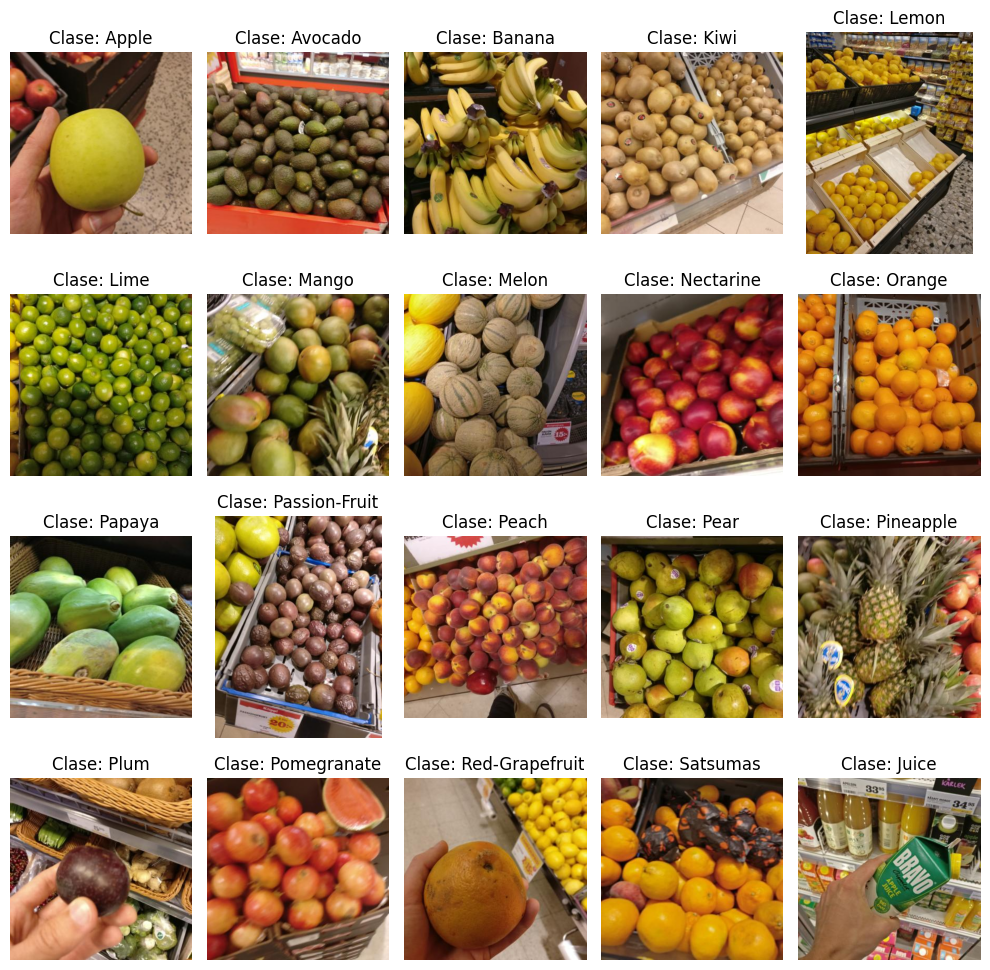

In [18]:
fig, axs = plt.subplots(4, 5, figsize=(10, 10))

# Mostrar cada imagen en una posición de la cuadrícula
for i, ax in enumerate(axs.flat):
    classes = train[train["Coarse Class ID"] == i]
    image_array = np.array(classes.iloc[0]['image_array'])
    ax.imshow(image_array)
    ax.set_title(f"Clase: {classes.iloc[0]['Coarse Class str']}")
    ax.axis("off")

plt.tight_layout()
plt.show()

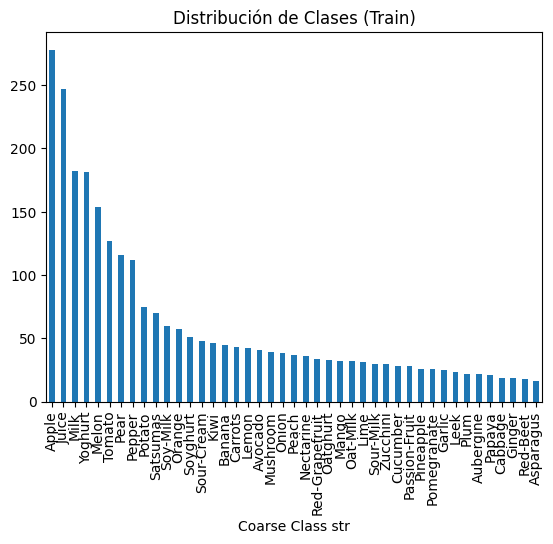

In [19]:
train_class_distribution = train['Coarse Class str'].value_counts()
test_class_distribution = test['Coarse Class str'].value_counts()
val_class_distribution = val['Coarse Class str'].value_counts()

# Visualización opcional
train_class_distribution.plot(kind='bar', title="Distribución de Clases (Train)")
plt.show()

Como vemos, los productos que más aparecen en el dataset de imágenes son manzanas, jugos y leche

/tmp/ipykernel_15258/2086599044.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(class_distribution.index, rotation=90)


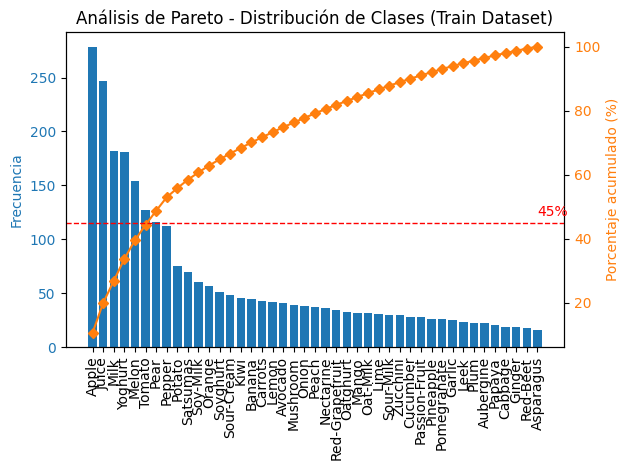

In [20]:
class_distribution = train['Coarse Class str'].value_counts()

cumulative_percentage = class_distribution.cumsum() / class_distribution.sum() * 100

fig, ax1 = plt.subplots()

ax1.bar(class_distribution.index, class_distribution, color="C0")
ax1.set_ylabel('Frecuencia', color="C0")
ax1.tick_params(axis='y', labelcolor="C0")
ax1.set_xticklabels(class_distribution.index, rotation=90)

ax2 = ax1.twinx()
ax2.plot(class_distribution.index, cumulative_percentage, color="C1", marker="D", ms=5)
ax2.set_ylabel('Porcentaje acumulado (%)', color="C1")
ax2.tick_params(axis='y', labelcolor="C1")

ax2.axhline(45, color='r', linestyle='--', linewidth=1)
ax2.text(len(class_distribution) - 1, 47, "45%", color="red", fontsize=10)

plt.title("Análisis de Pareto - Distribución de Clases (Train Dataset)")
plt.tight_layout()
plt.show()

In [21]:
cumulative_percentage

Coarse Class str
Apple              10.530303
Juice              19.886364
Milk               26.780303
Yoghurt            33.636364
Melon              39.469697
Tomato             44.280303
Pear               48.674242
Pepper             52.916667
Potato             55.757576
Satsumas           58.409091
Soy-Milk           60.681818
Orange             62.840909
Soyghurt           64.772727
Sour-Cream         66.590909
Kiwi               68.333333
Banana             70.037879
Carrots            71.666667
Lemon              73.257576
Avocado            74.810606
Mushroom           76.287879
Onion              77.727273
Peach              79.128788
Nectarine          80.492424
Red-Grapefruit     81.780303
Oatghurt           83.030303
Mango              84.242424
Oat-Milk           85.454545
Lime               86.628788
Sour-Milk          87.765152
Zucchini           88.901515
Cucumber           89.962121
Passion-Fruit      91.022727
Pineapple          92.007576
Pomegranate        92.9924

In [22]:
train[train['Coarse Class str'] == "Tomato"].shape

(127, 6)

Dada la subrepresentación de muchas clases, se definió un umbral de al menos 120 imágenes por clase con el fin de ser considerada como una clase para ser clasificada, asimismo, se va a hacer un sampleo de todas las clases con más de 120 imágenes

Seleccionar el 45% de los datos basándonos en el análisis de Pareto permite enfocarnos en las clases más representativas del conjunto de datos, maximizando la información contenida mientras se reduce significativamente la complejidad del problema.  

En el caso de este proyecto, las clases gruesas y finas están distribuidas de manera desigual, y priorizar aquellas que contribuyen al 45% de la información acumulada asegura que el modelo se entrene principalmente con las categorías más relevantes y frecuentes.

In [23]:
class_counts = train['Coarse Class str'].value_counts()
display(class_counts)
scarce_classes = class_counts[class_counts>120].index
display(scarce_classes)
no_scarce_train = train[train['Coarse Class str'].isin(scarce_classes)]
no_scarce_test = test[test['Coarse Class str'].isin(scarce_classes)]
no_scarce_val = val[val['Coarse Class str'].isin(scarce_classes)]

Coarse Class str
Apple             278
Juice             247
Milk              182
Yoghurt           181
Melon             154
Tomato            127
Pear              116
Pepper            112
Potato             75
Satsumas           70
Soy-Milk           60
Orange             57
Soyghurt           51
Sour-Cream         48
Kiwi               46
Banana             45
Carrots            43
Lemon              42
Avocado            41
Mushroom           39
Onion              38
Peach              37
Nectarine          36
Red-Grapefruit     34
Oatghurt           33
Mango              32
Oat-Milk           32
Lime               31
Sour-Milk          30
Zucchini           30
Cucumber           28
Passion-Fruit      28
Pineapple          26
Pomegranate        26
Garlic             25
Leek               23
Plum               22
Aubergine          22
Papaya             21
Cabbage            19
Ginger             19
Red-Beet           18
Asparagus          16
Name: count, dtype: int64

Index(['Apple', 'Juice', 'Milk', 'Yoghurt', 'Melon', 'Tomato'], dtype='object', name='Coarse Class str')

In [24]:
class_counts = no_scarce_train['Coarse Class str'].value_counts()
display(class_counts)

Coarse Class str
Apple      278
Juice      247
Milk       182
Yoghurt    181
Melon      154
Tomato     127
Name: count, dtype: int64

In [25]:
max_height, max_width, max_area = 0, 0, 0
min_height, min_width, min_area = float('inf'), float('inf'), float('inf')

for idx, row in no_scarce_train.iterrows():
    image_array = np.array(row['image_array'])
    height, width = image_array.shape[:2]
    area = height * width

    if height > max_height:
        max_height = height
    if width > max_width:
        max_width = width
    if area > max_area:
        max_area = area

    if height < min_height:
        min_height = height
    if width < min_width:
        min_width = width
    if area < min_area:
        min_area = area

print("Máxima altura:", max_height)
print("Máxima anchura:", max_width)
print("Máxima área:", max_area)
print("Mínima altura:", min_height)
print("Mínima anchura:", min_width)
print("Mínima área:", min_area)

Máxima altura: 464
Máxima anchura: 464
Máxima área: 161472
Mínima altura: 348
Mínima anchura: 348
Mínima área: 121104


array(['Apple', 'Melon', 'Juice', 'Milk', 'Yoghurt', 'Tomato'],
      dtype=object)

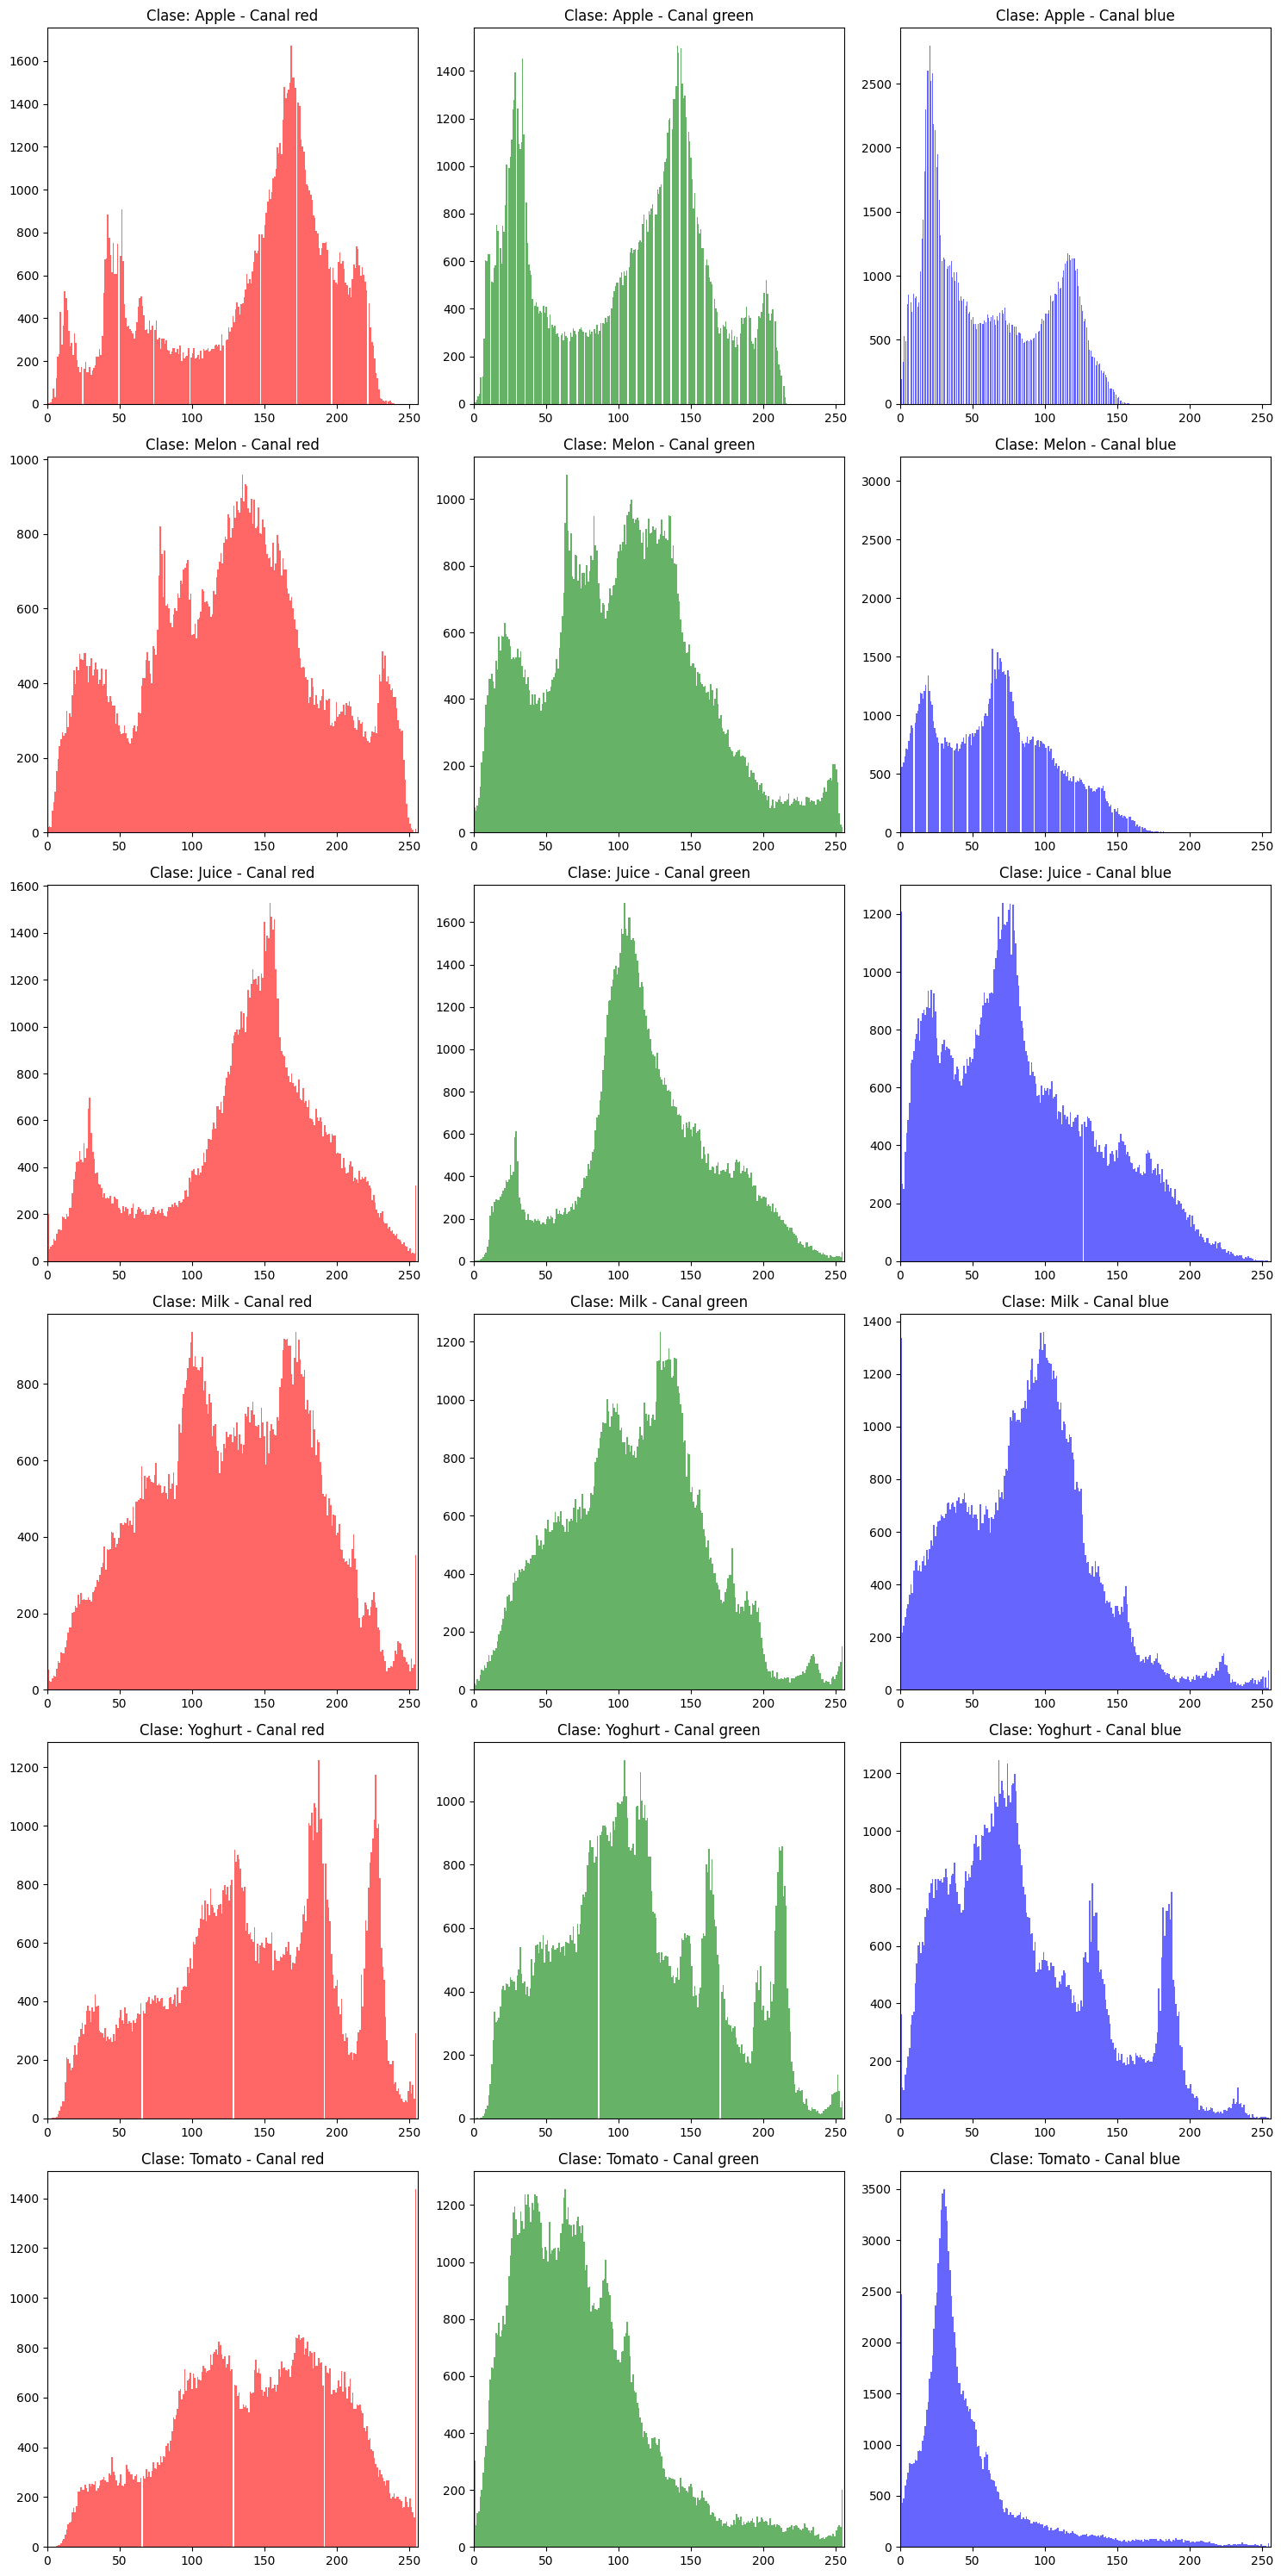

In [26]:
classes = no_scarce_train['Coarse Class str'].unique()
display(classes)

fig, axs = plt.subplots(len(classes), 3, figsize=(15, 5 * len(classes)))

for i, class_name in enumerate(classes):

    example_image = train[train['Coarse Class str'] == class_name].iloc[0]['image_array']
    image_array = np.array(example_image)
    
    colors = ('red', 'green', 'blue')
    for j, color in enumerate(colors):
        axs[i, j].hist(image_array[:, :, j].ravel(), bins=256, color=color, alpha=0.6)
        axs[i, j].set_title(f'Clase: {class_name} - Canal {color}')
        axs[i, j].set_xlim([0, 256])

plt.tight_layout()
plt.show()


Como vemos, si existen diferencias significativas en las distribuciones de las clases, por lo que puede ser interesante incluir información estadistica de los histogramas para los entrenamientos de los modelos

### 2.0. Datos para los modelos

In [27]:
 # Función para calcular estadísticas detalladas de los canales RGB
def extract_color_statistics(image):
    stats = {}
    for i, color in enumerate(['R', 'G', 'B']):
        channel = image[:, :, i].ravel()
        
        # Estadísticas básicas
        stats[f'{color}_mean'] = np.mean(channel)
        stats[f'{color}_std'] = np.std(channel)
        stats[f'{color}_median'] = np.median(channel)
        stats[f'{color}_25th'] = np.percentile(channel, 25)
        stats[f'{color}_75th'] = np.percentile(channel, 75)
        
        # Estadísticas avanzadas
        stats[f'{color}_skew'] = skew(channel)
        stats[f'{color}_kurtosis'] = kurtosis(channel)
        
        # Adicional: rango y varianza
        stats[f'{color}_range'] = np.max(channel) - np.min(channel)
        stats[f'{color}_variance'] = np.var(channel)
        
    return stats

In [28]:
# Función para procesar todas las imágenes de un conjunto de datos
def process_dataset_statistics(images):
    return [extract_color_statistics(img) for img in images]

In [29]:
no_scarce_train["Coarse Class str"].value_counts()

Coarse Class str
Apple      278
Juice      247
Milk       182
Yoghurt    181
Melon      154
Tomato     127
Name: count, dtype: int64

In [30]:
# Crear un mapeo de etiquetas consecutivas
unique_classes = sorted(no_scarce_train['Coarse Class ID'].unique())
class_mapping = {original: idx for idx, original in enumerate(unique_classes)}

# Aplicar el mapeo a los datasets
no_scarce_train['Coarse Class ID'] = no_scarce_train['Coarse Class ID'].map(class_mapping)
no_scarce_test['Coarse Class ID'] = no_scarce_test['Coarse Class ID'].map(class_mapping)
no_scarce_val['Coarse Class ID'] = no_scarce_val['Coarse Class ID'].map(class_mapping)

/tmp/ipykernel_15258/3191180846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_scarce_train['Coarse Class ID'] = no_scarce_train['Coarse Class ID'].map(class_mapping)
/tmp/ipykernel_15258/3191180846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_scarce_test['Coarse Class ID'] = no_scarce_test['Coarse Class ID'].map(class_mapping)
/tmp/ipykernel_15258/3191180846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [31]:
class_mapping

{np.int64(0): 0,
 np.int64(7): 1,
 np.int64(19): 2,
 np.int64(20): 3,
 np.int64(27): 4,
 np.int64(41): 5}

In [32]:
# Función para redimensionar las imágenes al mismo tamaño
def resize_images(image_list, target_size=(256, 256)):
    resized_images = []
    for img in image_list:
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        resized_images.append(resized_img)
    return np.array(resized_images)

In [33]:
# Función para balancear clases con ImageDataGenerator
def balance_with_datagen(train_data, target_size=(256, 256), batch_size=32):
    # Determinar el máximo número de imágenes entre todas las clases
    class_counts = train_data['Coarse Class ID'].value_counts()
    max_count = class_counts.max()
    
    # DataFrame para almacenar datos aumentados
    balanced_images = []
    balanced_labels = []
    
    datagen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    for class_id, group in train_data.groupby('Coarse Class ID'):
        # Redimensionar imágenes de la clase actual
        images = resize_images(group['image_array'].values, target_size)
        labels = group['Coarse Class ID'].values
        
        # Normalizar imágenes
        images = images / 255.0
        
        # Crear generador para esta clase
        generator = datagen.flow(
            images, 
            labels, 
            batch_size=batch_size
        )
        
        # Generar imágenes hasta alcanzar el máximo número de la clase más grande
        class_images = []
        class_labels = []
        while len(class_images) < max_count:
            batch_images, batch_labels = next(generator)
            class_images.extend(batch_images)
            class_labels.extend(batch_labels)
        
        # Agregar imágenes y etiquetas balanceadas de esta clase
        balanced_images.extend(class_images[:max_count])
        balanced_labels.extend(class_labels[:max_count])
    
    # Convertir a arrays finales
    balanced_images = np.array(balanced_images)
    balanced_labels = np.array(balanced_labels)
    return balanced_images, balanced_labels

In [34]:
# Balancear los datos de entrenamiento
target_size = (256, 256)
batch_size = 12
balanced_train_images, balanced_train_labels = balance_with_datagen(no_scarce_train, target_size, batch_size)

# Redimensionar y normalizar el conjunto de prueba
test_images = resize_images(no_scarce_test['image_array'].values, target_size) / 255.0
test_labels = no_scarce_test['Coarse Class ID'].values

val_images = resize_images(no_scarce_val['image_array'].values, target_size) / 255.0
val_labels = no_scarce_val['Coarse Class ID'].values

In [35]:
len(balanced_train_images)

1668

In [36]:
len(balanced_train_labels)

1668

In [37]:
unique, counts = np.unique(balanced_train_labels, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(278),
 np.int64(1): np.int64(278),
 np.int64(2): np.int64(278),
 np.int64(3): np.int64(278),
 np.int64(4): np.int64(278),
 np.int64(5): np.int64(278)}

In [38]:
unique, counts = np.unique(test_labels, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(276),
 np.int64(1): np.int64(153),
 np.int64(2): np.int64(219),
 np.int64(3): np.int64(164),
 np.int64(4): np.int64(172),
 np.int64(5): np.int64(100)}

In [39]:
unique, counts = np.unique(val_labels, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(22),
 np.int64(1): np.int64(20),
 np.int64(2): np.int64(29),
 np.int64(3): np.int64(26),
 np.int64(4): np.int64(20),
 np.int64(5): np.int64(8)}

In [40]:
 # Función para calcular estadísticas detalladas de los canales RGB
def extract_color_statistics(image):
    stats = {}
    for i, color in enumerate(['R', 'G', 'B']):
        channel = image[:, :, i].ravel()
        
        # Estadísticas básicas
        stats[f'{color}_mean'] = np.mean(channel)
        stats[f'{color}_std'] = np.std(channel)
        stats[f'{color}_median'] = np.median(channel)
        stats[f'{color}_25th'] = np.percentile(channel, 25)
        stats[f'{color}_75th'] = np.percentile(channel, 75)
        
        # Estadísticas avanzadas
        stats[f'{color}_skew'] = skew(channel)
        stats[f'{color}_kurtosis'] = kurtosis(channel)
        
        # Adicional: rango y varianza
        stats[f'{color}_range'] = np.max(channel) - np.min(channel)
        stats[f'{color}_variance'] = np.var(channel)
        
    return stats

# Función para procesar todas las imágenes de un conjunto de datos
def process_dataset_statistics(images):
    return [extract_color_statistics(img) for img in images]

In [41]:
# Aplicar la función a tus datasets (train, test, val)
train_detailed_stats = process_dataset_statistics(balanced_train_images)
test_detailed_stats = process_dataset_statistics(test_images)
val_detailed_stats = process_dataset_statistics(val_images)

In [42]:
train_detailed_stats

[{'R_mean': np.float32(0.47765976),
  'R_std': np.float32(0.2269864),
  'R_median': np.float32(0.50980806),
  'R_25th': np.float32(0.3122399),
  'R_75th': np.float32(0.66894746),
  'R_skew': np.float32(-0.44903505),
  'R_kurtosis': np.float32(-0.91244173),
  'R_range': np.float32(0.97619987),
  'R_variance': np.float32(0.05152282),
  'G_mean': np.float32(0.38233328),
  'G_std': np.float32(0.22880422),
  'G_median': np.float32(0.41515115),
  'G_25th': np.float32(0.1387206),
  'G_75th': np.float32(0.5863794),
  'G_skew': np.float32(-0.17532198),
  'G_kurtosis': np.float32(-1.3588475),
  'G_range': np.float32(0.92900634),
  'G_variance': np.float32(0.052351367),
  'B_mean': np.float32(0.16709088),
  'B_std': np.float32(0.16334923),
  'B_median': np.float32(0.10475342),
  'B_25th': np.float32(0.046349417),
  'B_75th': np.float32(0.2322057),
  'B_skew': np.float32(1.2124733),
  'B_kurtosis': np.float32(0.32299995),
  'B_range': np.float32(0.891508),
  'B_variance': np.float32(0.026682971)},

In [43]:
len(train_detailed_stats)

1668

In [44]:
data_to_save = {
    'val_labels': val_labels,
    'val_images': val_images,
    'test_images': test_images,
    'test_labels': test_labels,
    'balanced_train_images': balanced_train_images,
    'balanced_train_labels': balanced_train_labels,
    'train_detailed_stats': train_detailed_stats,
    'test_detailed_stats': test_detailed_stats,
    'val_detailed_stats': val_detailed_stats    
}

In [45]:
with open('data.pickle', 'wb') as f:
    pickle.dump(data_to_save, f)